In [1]:
# Creación aleatoria de datos
import numpy as np
X = np.array([0.5, 23, 0.3, 4.5, 0.3, 0.5,
              -28, -50, 60, -100, -10, -11, 13, 19, 1, 9])

In [2]:
# Medidas de tendencia central
from scipy import stats

media = np.mean(X)
mediana = np.median(X)
moda, _ = stats.mode(X)
print('media: ', media)
print('mediana: ', mediana)
print('moda :', moda[0])

media:  -4.24375
mediana:  0.5
moda : 0.3


C:\Users\jusir\AppData\Local\Temp\ipykernel_26820\1173900702.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda, _ = stats.mode(X)


In [3]:
# Medidas de posición
import numpy as np
import matplotlib.pyplot as plt

Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
RIC = Q3 - Q1
lim_inf = Q1 - 1.5*RIC
lim_sup = Q3 + 1.5*RIC

print('RIC :', RIC)
print('limite inferior :', lim_inf)
print('limite superior :', lim_sup)

RIC : 20.25
limite inferior : -40.625
limite superior : 40.375


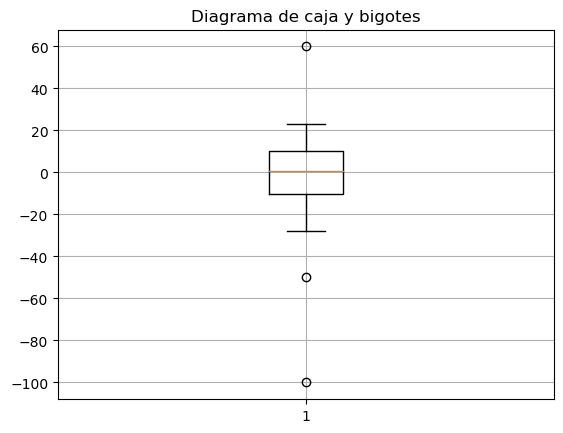

In [4]:
# Dibuja el diagrama de box and whiskers y determina visualmente el número de outliers
plt.boxplot(X)
plt.grid()
plt.title('Diagrama de caja y bigotes')
plt.show()

In [5]:
# Medidas de dispersión
desvest = np.std(X)
print('Desviación típica: ', desvest)
print('Varianza: ', desvest**2)

Desviación típica:  33.521242681880096
Varianza:  1123.6737109375


In [6]:
# Medidas de distribución
asimetria = stats.skew(X)
curtosis = stats.kurtosis(X, fisher=False) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html
print('Asimetría ', np.round(asimetria, 4))
print('Curtosis ', np.round(curtosis, 4))

if curtosis>0:
    print('Distribución Leptocúrtica')
elif curtosis<0:
    print('Distribución Platicúrtica')
else:
    print('Distribución Mesocúrtica')

Asimetría  -1.1302
Curtosis  5.2858
Distribución Leptocúrtica


In [7]:
# Cargar el set de datos de Iris
from sklearn import datasets
from pprint import pprint
iris = datasets.load_iris()
#pprint(iris)sep

In [8]:
# Extraer datos y target
X = iris.data
y = iris.target

# ¿Qué tipo de asimetría se observa en la variable "longitud del pétalo"?
# Extraer las medidas de distribución de la longitud del pétalo
petal_len = X[:,2]
asimetria = stats.skew(petal_len)
print(asimetria)

# ¿A qué tipo de distribución se ajusta la variable "ancho del sépalo", según su curtosis?
sepal_width = X[:,1]
curtosis = stats.kurtosis(sepal_width, fisher=True)
print(curtosis)

-0.2721276664567214
0.18097631752246768


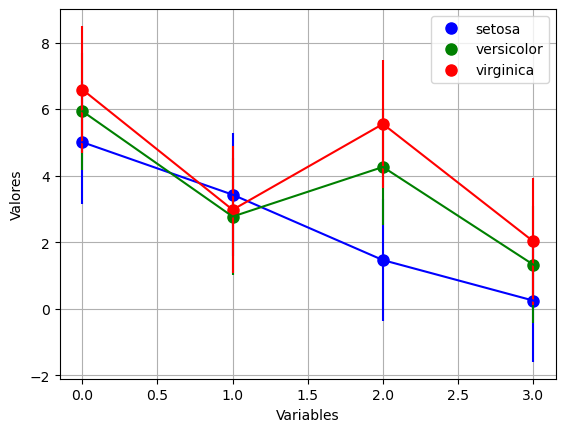

In [9]:
# EJERCICIO EXTRA SOBRE EL DATASET DE IRIS
# Extraer la media y la desviación típica de cada variable en función de la clase y representarlo en un gráfico (plt.errorbar)
colors=['blue', 'green', 'red']
for k in range(3): # 3 classes
    data_clase = X[y==k]
    mean_class = np.mean(data_clase, axis=0)
    desv_class = np.std(data_clase)
    col = ''.join(['o', colors[k][0]])
    plt.plot(range(4), mean_class, col, markersize=8, linewidth=5)
    plt.errorbar(range(4), mean_class, yerr=desv_class, color=colors[k])
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.grid()
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()